# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#STARTER CODE
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key #changed this!

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [8]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [13]:
print(cities)

len(cities)

['oranjemund', 'loreto', 'busselton', 'vardo', 'te anau', 'korla', 'saldanha', 'bluff', 'bredasdorp', 'vestmannaeyjar', 'punta arenas', 'ushuaia', 'orange cove', 'laguna', 'ribeira grande', 'port alfred', 'grand river south east', 'kavaratti', 'qaqortoq', 'marathon', 'avarua', 'bone', 'barentsburg', 'yulara', 'thompson', 'sitka', 'rikitea', 'karakendzha', 'tiksi', 'stokmarknes', 'chingola', 'constantine', 'aklavik', 'linhares', 'lewisporte', 'butaritari', 'itaqui', 'taolanaro', 'mapastepec', 'sentyabrskiy', 'muros', 'hermanus', 'hithadhoo', 'harper', 'zhigansk', 'mataura', 'cikupa', 'dikson', 'faanui', 'ostrovnoy', 'kiruna', 'san quintin', 'sangar', 'tuatapere', 'ahipara', 'carauari', 'wanning', 'fairbanks', 'khatanga', 'port hardy', 'jamestown', 'cape town', 'saint george', 'yellowknife', 'albany', 'mar del plata', 'tsihombe', 'bage', 'nikolskoye', 'belushya guba', 'hobart', 'saint-philippe', 'bethel', 'esperance', 'kaka', 'mahebourg', 'ketchikan', 'vilcun', 'arraial do cabo', 'kargop

583

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [14]:
#THE BELOW CODE IS JUST A GUIDE TO TELL ME WHERE EACH VALUE IS LOCATED IN THE DICTIONARY/JSON DATA

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city = 'st. louis'

#q represents the city
req = requests.get(base_url + f'&q={city}')


print(base_url + f'&q={city}') #f'' is a formatting notation and &q= is how the
                               #open weather map expects us to pass in the city
                               #aka q represents city
#create a json output of the data
json_data = req.json()
print(json_data)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4614311f0b8ec98cc359660ec59c77bf&q=st. louis
{'coord': {'lon': -90.1979, 'lat': 38.6273}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.96, 'feels_like': 66.52, 'temp_min': 65.34, 'temp_max': 71.56, 'pressure': 1025, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 292, 'gust': 4}, 'clouds': {'all': 1}, 'dt': 1634494503, 'sys': {'type': 2, 'id': 2009674, 'country': 'US', 'sunrise': 1634472721, 'sunset': 1634512787}, 'timezone': -18000, 'id': 4407066, 'name': 'St Louis', 'cod': 200}


In [31]:
cities

city_weather = {'city':[],
               'lon':[],
               'lat': [],
               'country':[],
               'max temperature':[],
               'pressure':[],
               'humidity':[],
               'wind speed':[],
               'cloudiness':[]}


#loop thru each city from the 500+ list of cites and give the information that is in the dict.

for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    #tray/except--if an error occurs when calling the api we use exception handling 
    try:     
        #q represents the city
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json() #convert req to json so easier to read instead of text 
                          #'casting req to json'
        #add values to our city weather dict
        #Reference: name of dic, column you are adding data to,
        #.append, what you're adding(data taken from dict--name)
        city_weather['city'].append(data['name'])
        city_weather['lon'].append(data['coord']['lon'])
        city_weather['lat'].append(data['coord']['lat'])
        city_weather['country'].append(data['sys']['country'])
        city_weather['max temperature'].append(data['main']['temp_max'])
        city_weather['pressure'].append(data['main']['pressure'])
        city_weather['humidity'].append(data['main']['humidity'])
        city_weather['wind speed'].append(data['wind']['speed'])
        city_weather['cloudiness'].append(data['clouds']['all'])
        
        print("processing " + city)
    except:
        print(city+ " not found") #print the error(name of city + not found)
        pass #if we want the code to continue to the next part of the loop we use 'pass'
    

processing oranjemund
processing loreto
processing busselton
processing vardo
processing te anau
processing korla
processing saldanha
processing bluff
processing bredasdorp
processing vestmannaeyjar
processing punta arenas
processing ushuaia
processing orange cove
processing laguna
processing ribeira grande
processing port alfred
grand river south east not found
processing kavaratti
processing qaqortoq
processing marathon
processing avarua
processing bone
barentsburg not found
processing yulara
processing thompson
processing sitka
processing rikitea
karakendzha not found
processing tiksi
processing stokmarknes
processing chingola
processing constantine
processing aklavik
processing linhares
processing lewisporte
processing butaritari
processing itaqui
taolanaro not found
processing mapastepec
sentyabrskiy not found
processing muros
processing hermanus
processing hithadhoo
processing harper
processing zhigansk
processing mataura
processing cikupa
processing dikson
processing faanui
proc

processing zyryanka
processing finale ligure
processing beloha
processing arlit
processing tabou
processing constitucion
processing mount gambier
processing high level
processing the valley
processing carmelo
processing grindavik
processing tura
processing eskilstuna
processing benguela
processing guerrero negro
processing dzheyrakh
processing batemans bay
processing hobyo
processing mantua
tumannyy not found
processing kharan
processing rosetta
processing bara
processing xixiang
processing taoudenni
processing presidencia roque saenz pena
processing senneterre
processing lovozero
processing sur
processing nanortalik
processing jumla
processing vaxjo
processing conakry
sorvag not found
processing lebu
processing doka
processing emba
processing preobrazheniye
processing biak
processing bijie
processing baghdad
processing carnot
processing ust-tsilma
processing kurya
processing narsaq
palabuhanratu not found
processing chistogorskiy
processing puerto del rosario
processing launceston
pro

In [ ]:
city_weather.items()

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [35]:
city_data_df = pd.DataFrame.from_dict(city_weather)

In [36]:
city_data_df.count()

city               531
lon                531
lat                531
country            531
max temperature    531
pressure           531
humidity           531
wind speed         531
cloudiness         531
dtype: int64

In [ ]:
#city_data_df2 = pd.DataFrame(city_weather)

In [4]:
#GUIDE

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
#GUIDE

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [37]:
city_data_df

,city,lon,lat,country,max temperature,pressure,humidity,wind speed,cloudiness
0,Oranjemund,16.4333,-28.5500,NA,57.02,1023,75,20.94,0
1,Loreto,-101.9667,22.2667,MX,71.40,1017,41,8.08,9
2,Busselton,115.3333,-33.6500,AU,50.04,1008,79,7.49,23
3,Vardø,31.1107,70.3705,NO,40.98,995,81,25.32,75
4,Te Anau,167.7167,-45.4167,NZ,48.63,1004,95,0.98,100
...,...,...,...,...,...,...,...,...,...
526,Pacific Grove,-121.9166,36.6177,US,73.62,1014,77,5.01,1
527,Leh,77.5833,34.1667,IN,41.68,1017,79,2.44,100
528,Paita,-81.1144,-5.0892,PE,77.56,1011,76,17.67,74
529,Kosonsoy,71.5508,41.2561,UZ,46.96,1015,24,3.74,92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

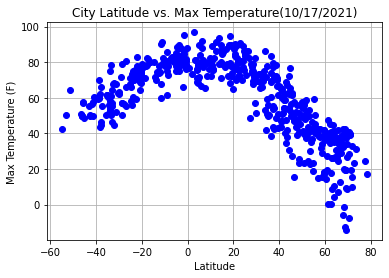

In [65]:
fig, ax = plt.subplots()

ax.plot(city_data_df['lat'], city_data_df['max temperature'], marker = "o", linestyle='None', color= 'blue')

# Set the x-axis label
ax.set_xlabel('Latitude')

# Set the y-axis label 
ax.set_ylabel('Max Temperature (F)')

# Set the title
ax.set_title("City Latitude vs. Max Temperature(10/17/2021)")

plt.grid()

plt.savefig("City Latitude vs. Max Temperature.png")

plt.show()

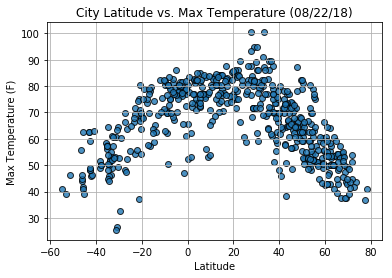

#### Latitude vs. Humidity Plot

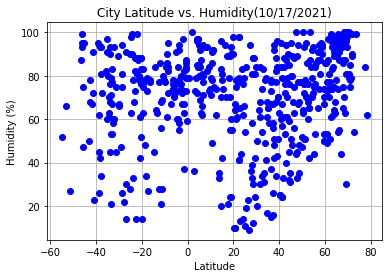

In [66]:
fig, ax = plt.subplots()

ax.plot(city_data_df['lat'], city_data_df['humidity'], marker = "o", linestyle='None', color= 'blue')

# Set the x-axis label
ax.set_xlabel('Latitude')

# Set the y-axis label 
ax.set_ylabel('Humidity (%)')

# Set the title
ax.set_title("City Latitude vs. Humidity(10/17/2021)")

plt.grid()

plt.savefig("Latitude vs. Humidity.png")

plt.show()

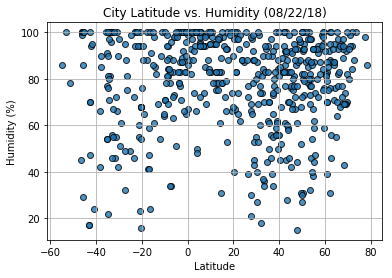

#### Latitude vs. Cloudiness Plot

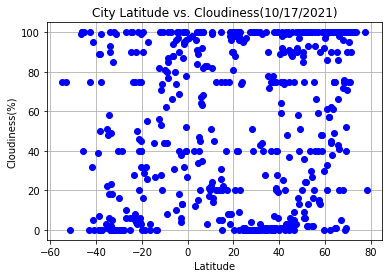

In [67]:
fig, ax = plt.subplots()

ax.plot(city_data_df['lat'], city_data_df['cloudiness'], marker = "o", linestyle='None', color= 'blue')

# Set the x-axis label
ax.set_xlabel('Latitude')

# Set the y-axis label 
ax.set_ylabel('Cloudiness(%)')

# Set the title
ax.set_title("City Latitude vs. Cloudiness(10/17/2021)")

plt.grid()

plt.savefig("Latitude vs. Cloudiness.png")

plt.show()

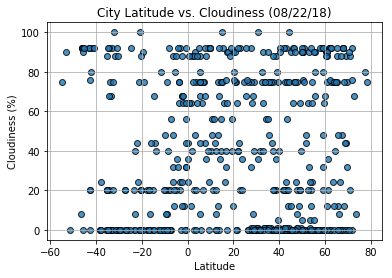

#### Latitude vs. Wind Speed Plot

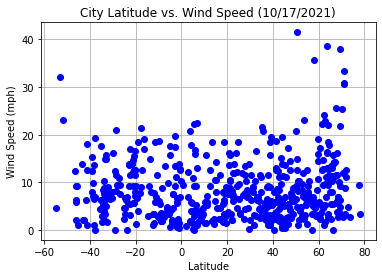

In [68]:
fig, ax = plt.subplots()

ax.plot(city_data_df['lat'], city_data_df['wind speed'], marker = "o", linestyle='None', color= 'blue')

# Set the x-axis label
ax.set_xlabel('Latitude')

# Set the y-axis label 
ax.set_ylabel('Wind Speed (mph)')

# Set the title
ax.set_title("City Latitude vs. Wind Speed (10/17/2021)")

plt.grid()

plt.savefig("Latitude vs. Wind Speed.png")

plt.show()

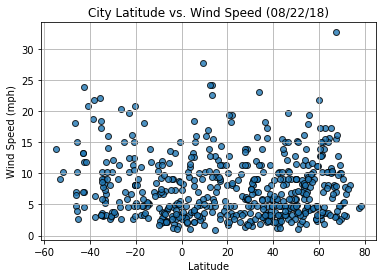

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

In [40]:
city_data_df.head()

,city,lon,lat,country,max temperature,pressure,humidity,wind speed,cloudiness
0,Oranjemund,16.4333,-28.5500,NA,57.02,1023,75,20.94,0
1,Loreto,-101.9667,22.2667,MX,71.40,1017,41,8.08,9
2,Busselton,115.3333,-33.6500,AU,50.04,1008,79,7.49,23
3,Vardø,31.1107,70.3705,NO,40.98,995,81,25.32,75
4,Te Anau,167.7167,-45.4167,NZ,48.63,1004,95,0.98,100


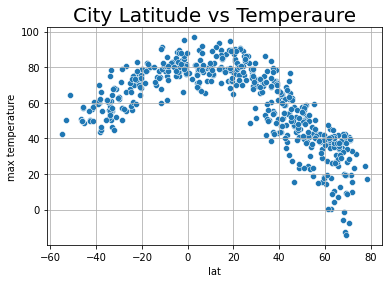

In [72]:
import seaborn as sns

city_data_df

sns.scatterplot(x="lat", y="max temperature", data = city_data_df)

plt.title("City Latitude vs Temperaure", size=20)

plt.grid()

plt.savefig("Latitude vs. Temperature 2.png")

plt.show()

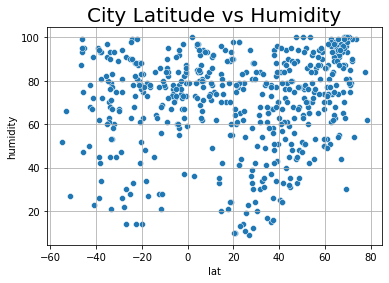

In [73]:
import seaborn as sns

city_data_df

sns.scatterplot(x="lat", y="humidity", data = city_data_df)

plt.title("City Latitude vs Humidity", size=20)

plt.grid()

plt.savefig("Latitude vs. Humidity 2.png")

plt.show()

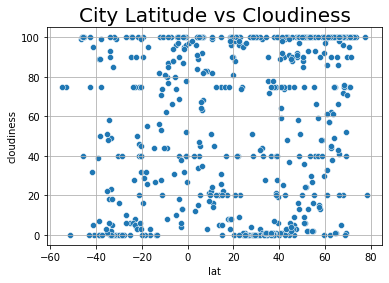

In [74]:
import seaborn as sns

city_data_df

sns.scatterplot(x="lat", y="cloudiness", data = city_data_df)

plt.title("City Latitude vs Cloudiness", size=20)

plt.grid()

plt.savefig("Latitude vs. Cloudiness 2.png")

plt.show()

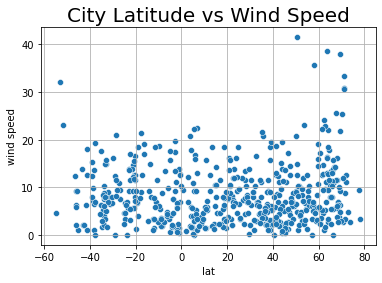

In [75]:
import seaborn as sns

city_data_df

sns.scatterplot(x="lat", y="wind speed", data = city_data_df)

plt.title("City Latitude vs Wind Speed", size=20)

plt.grid()

plt.savefig("Latitude vs. Wind Speed 2.png")

plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

1) As we get closer to te equator, the temperatures begin to rise. In the southern hemisphere, the temperatures are generally greater than those in the northern hemisphere. 

2) The humidity near the equator is generally higher.

3) Many cities in the list have a wind speed of 0-10mph regardless of the lattitude. 

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 